# Wine Target Prediction :  Random Forest ML Model
# Ensemble ML:
- Bagging  :- Parallel
- Boosting :- Sequential

In [105]:
# Designed By : ALTAF HUSAIN DATA ANALYST

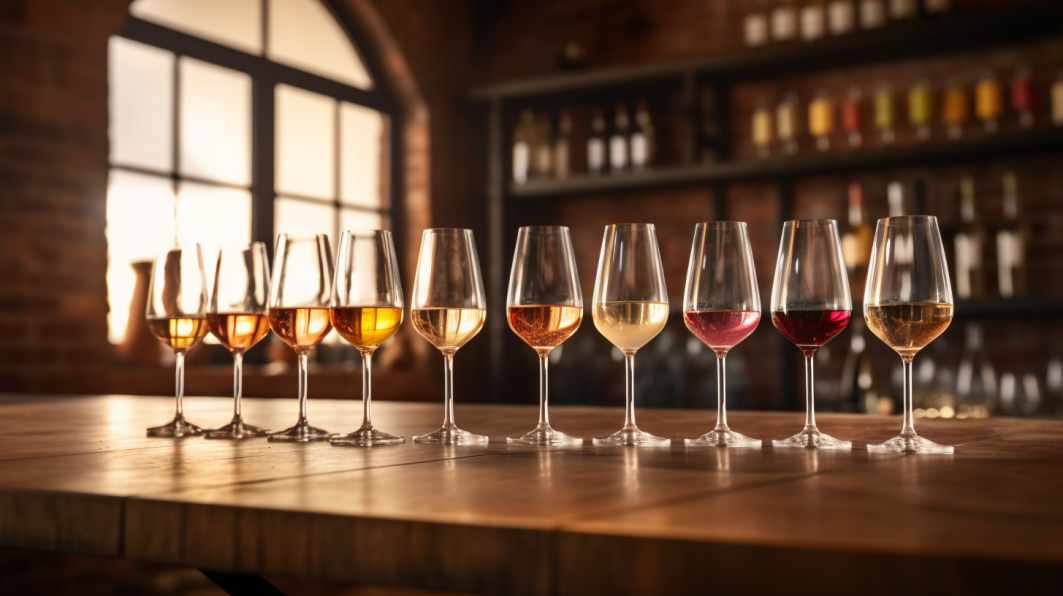

# Import Molues

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.datasets import load_wine

#  load data

In [107]:
wine = load_wine()

In [108]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [109]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [110]:
df =pd.DataFrame(wine['data'],columns = wine['feature_names'])
df['target_class'] = wine.target

In [111]:
df.sample()

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  total_phenols  \
131    12.88        2.99  2.4               20.0      104.0            1.3   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
131        1.22                  0.24             0.83              5.4  0.74   

     od280/od315_of_diluted_wines  proline  target_class  
131                          1.42    530.0             2

In [112]:
classes = ['Low Quality','Medium Quality','High Quality']

In [113]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [114]:
X.shape

(178, 13)

In [115]:
y.shape

(178,)

In [116]:
X.sample()

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  total_phenols  \
140    12.93        2.81  2.7               21.0       96.0           1.54   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
140         0.5                  0.53             0.75              4.6  0.77   

     od280/od315_of_diluted_wines  proline  
140                          2.31    600.0

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [118]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target_class                    0
dtype: int64

# EDA

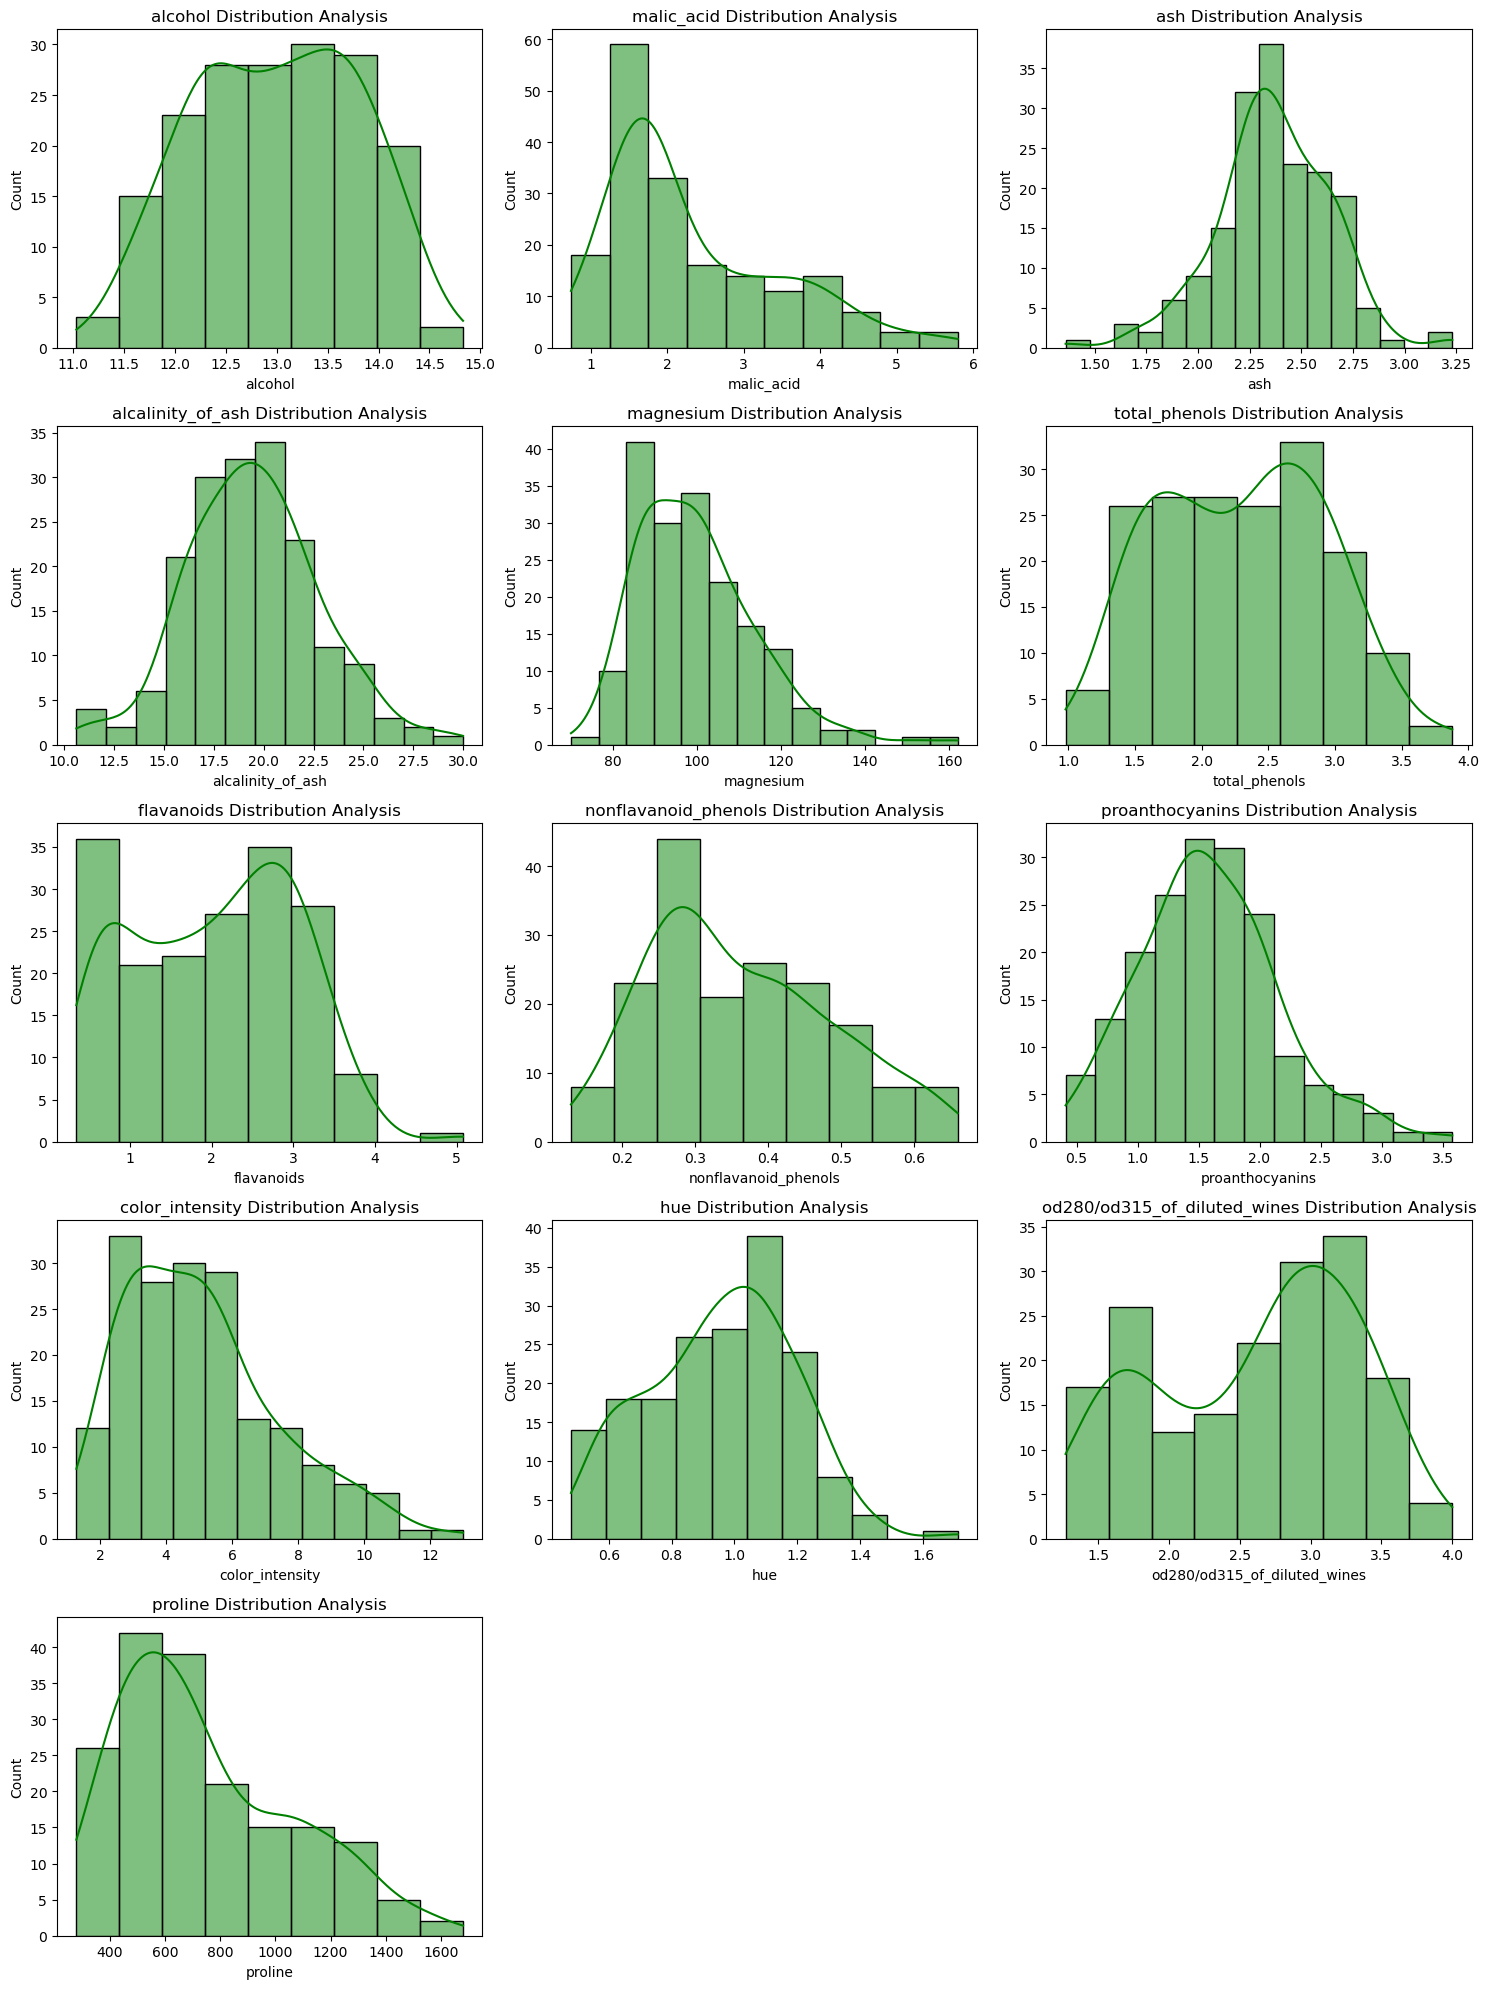

In [119]:
plt.figure(figsize=(15,20))
for i in range(13):
    plt.subplot(5,3,i+1)
    sns.histplot(data=X, x=X.columns[i], color='g',kde =True)
    plt.title(f'{X.columns[i]} Distribution Analysis')
plt.tight_layout()
plt.show()

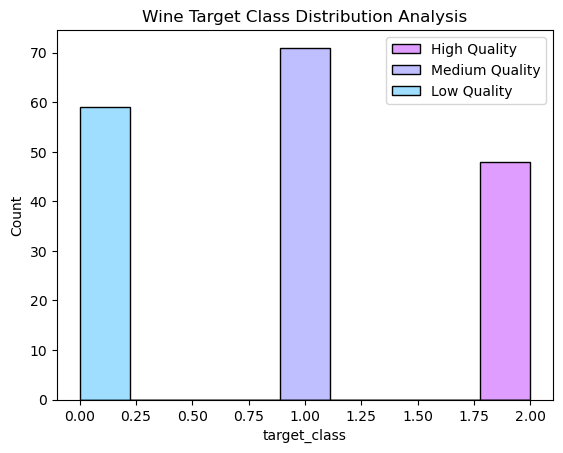

In [120]:
sns.histplot(data = df, x=df['target_class'],hue=df.columns[-1] ,kde =True,palette=sns.color_palette('cool',3))
plt.legend(classes[::-1])
plt.title('Wine Target Class Distribution Analysis')
plt.show()

# Data Preprocessing

In [121]:
# MinMax_Scaler

In [122]:
scaler = MinMaxScaler()

# Before scale

In [123]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

       target_class  
count    178.000000  
mean       0.938202  
std        0.775035  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        2.000000  
max        2.000000

# After scale

In [124]:
X_scaled =  scaler.fit_transform(X)

In [125]:
X_scaled_df = pd.DataFrame(X_scaled,columns = X.columns)

In [126]:
X_scaled_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.518584    0.315484    0.538244           0.458502    0.323278   
std      0.213639    0.220780    0.146708           0.172142    0.155244   
min      0.000000    0.000000    0.000000           0.000000    0.000000   
25%      0.350658    0.170455    0.454545           0.340206    0.195652   
50%      0.531579    0.222332    0.534759           0.458763    0.304348   
75%      0.696711    0.462945    0.640374           0.561856    0.402174   
max      1.000000    1.000000    1.000000           1.000000    1.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.453487    0.356386              0.437460         0.372523   
std         0.215811    0.210730              0.234818         0.180555   
min         0.000000    0.000000              0.000000         0.000000   
25%         0.262931    0.182489              0.264151         0.264984   
50%         0.474138    0.378692              0.396226         0.361199   
75%         0.627586    0.534810              0.580189         0.485804   
max         1.000000    1.000000              1.000000         1.000000   

       color_intensity         hue  od280/od315_of_diluted_wines     proline  
count       178.000000  178.000000                    178.000000  178.000000  
mean          0.322363    0.388170                      0.491460    0.334446  
std           0.197806    0.185831                      0.260070    0.224613  
min           0.000000    0.000000                      0.000000    0.000000  
25%           0.165529    0.245935                      0.244505    0.158702  
50%           0.290956    0.394309                      0.553114    0.282097  
75%           0.419795    0.520325                      0.695971    0.504280  
max           1.000000    1.000000                      1.000000    1.000000

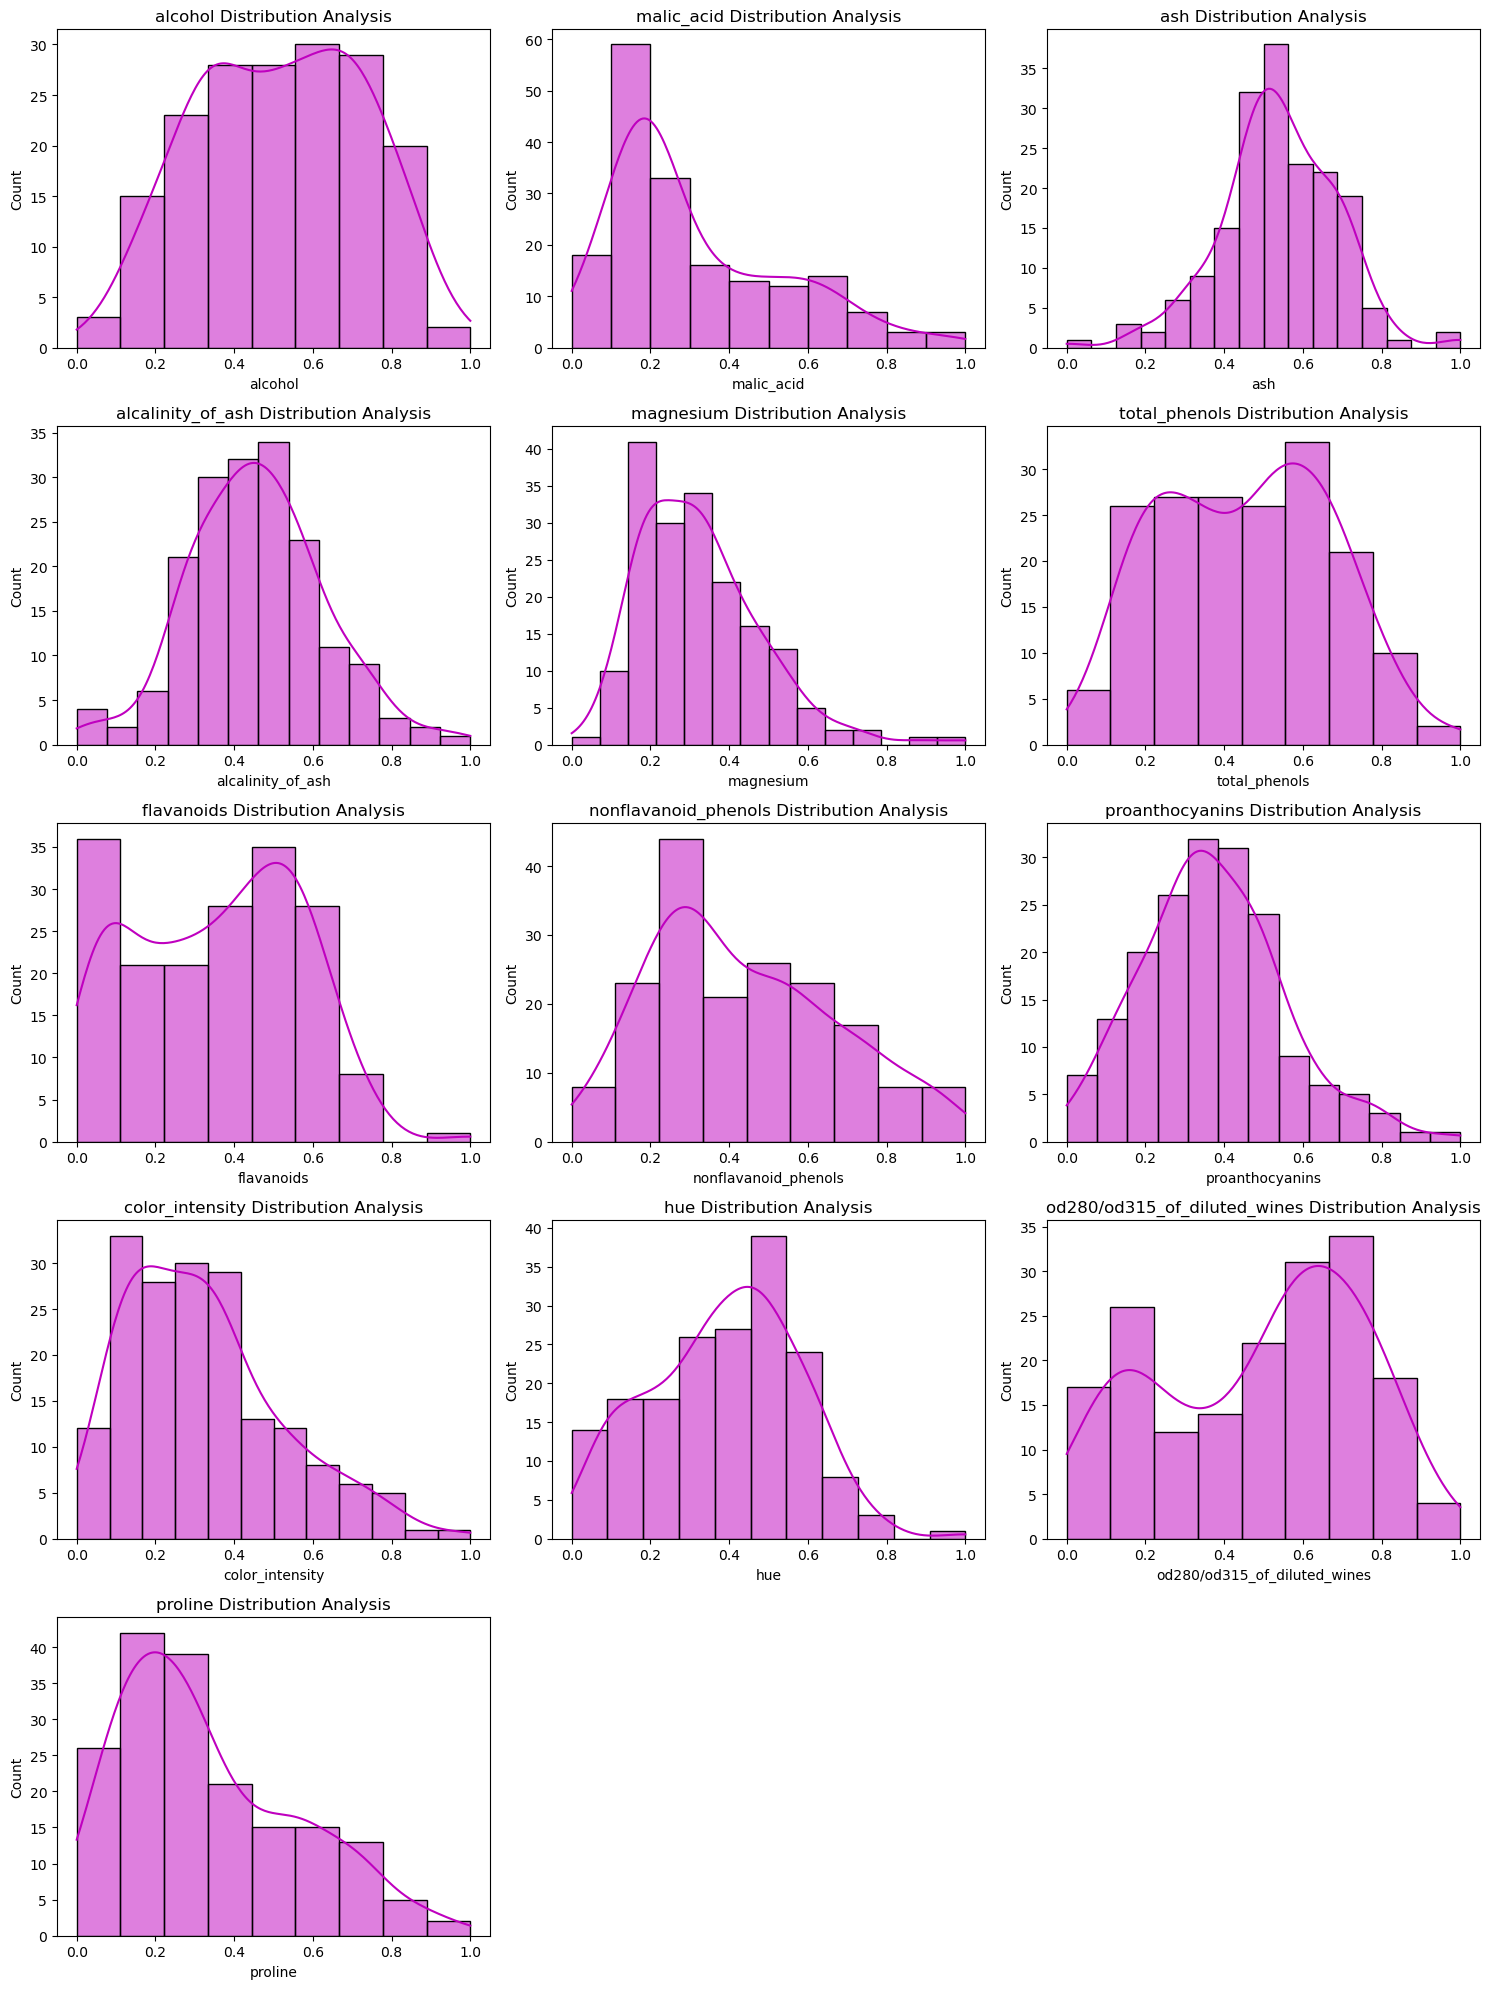

In [127]:
plt.figure(figsize=(15,20))
for i in range(13):
    plt.subplot(5,3,i+1)
    sns.histplot(data=X_scaled_df, x=X_scaled_df.columns[i], color='m',kde =True)
    plt.title(f'{X_scaled_df.columns[i]} Distribution Analysis')
plt.tight_layout()
plt.show()

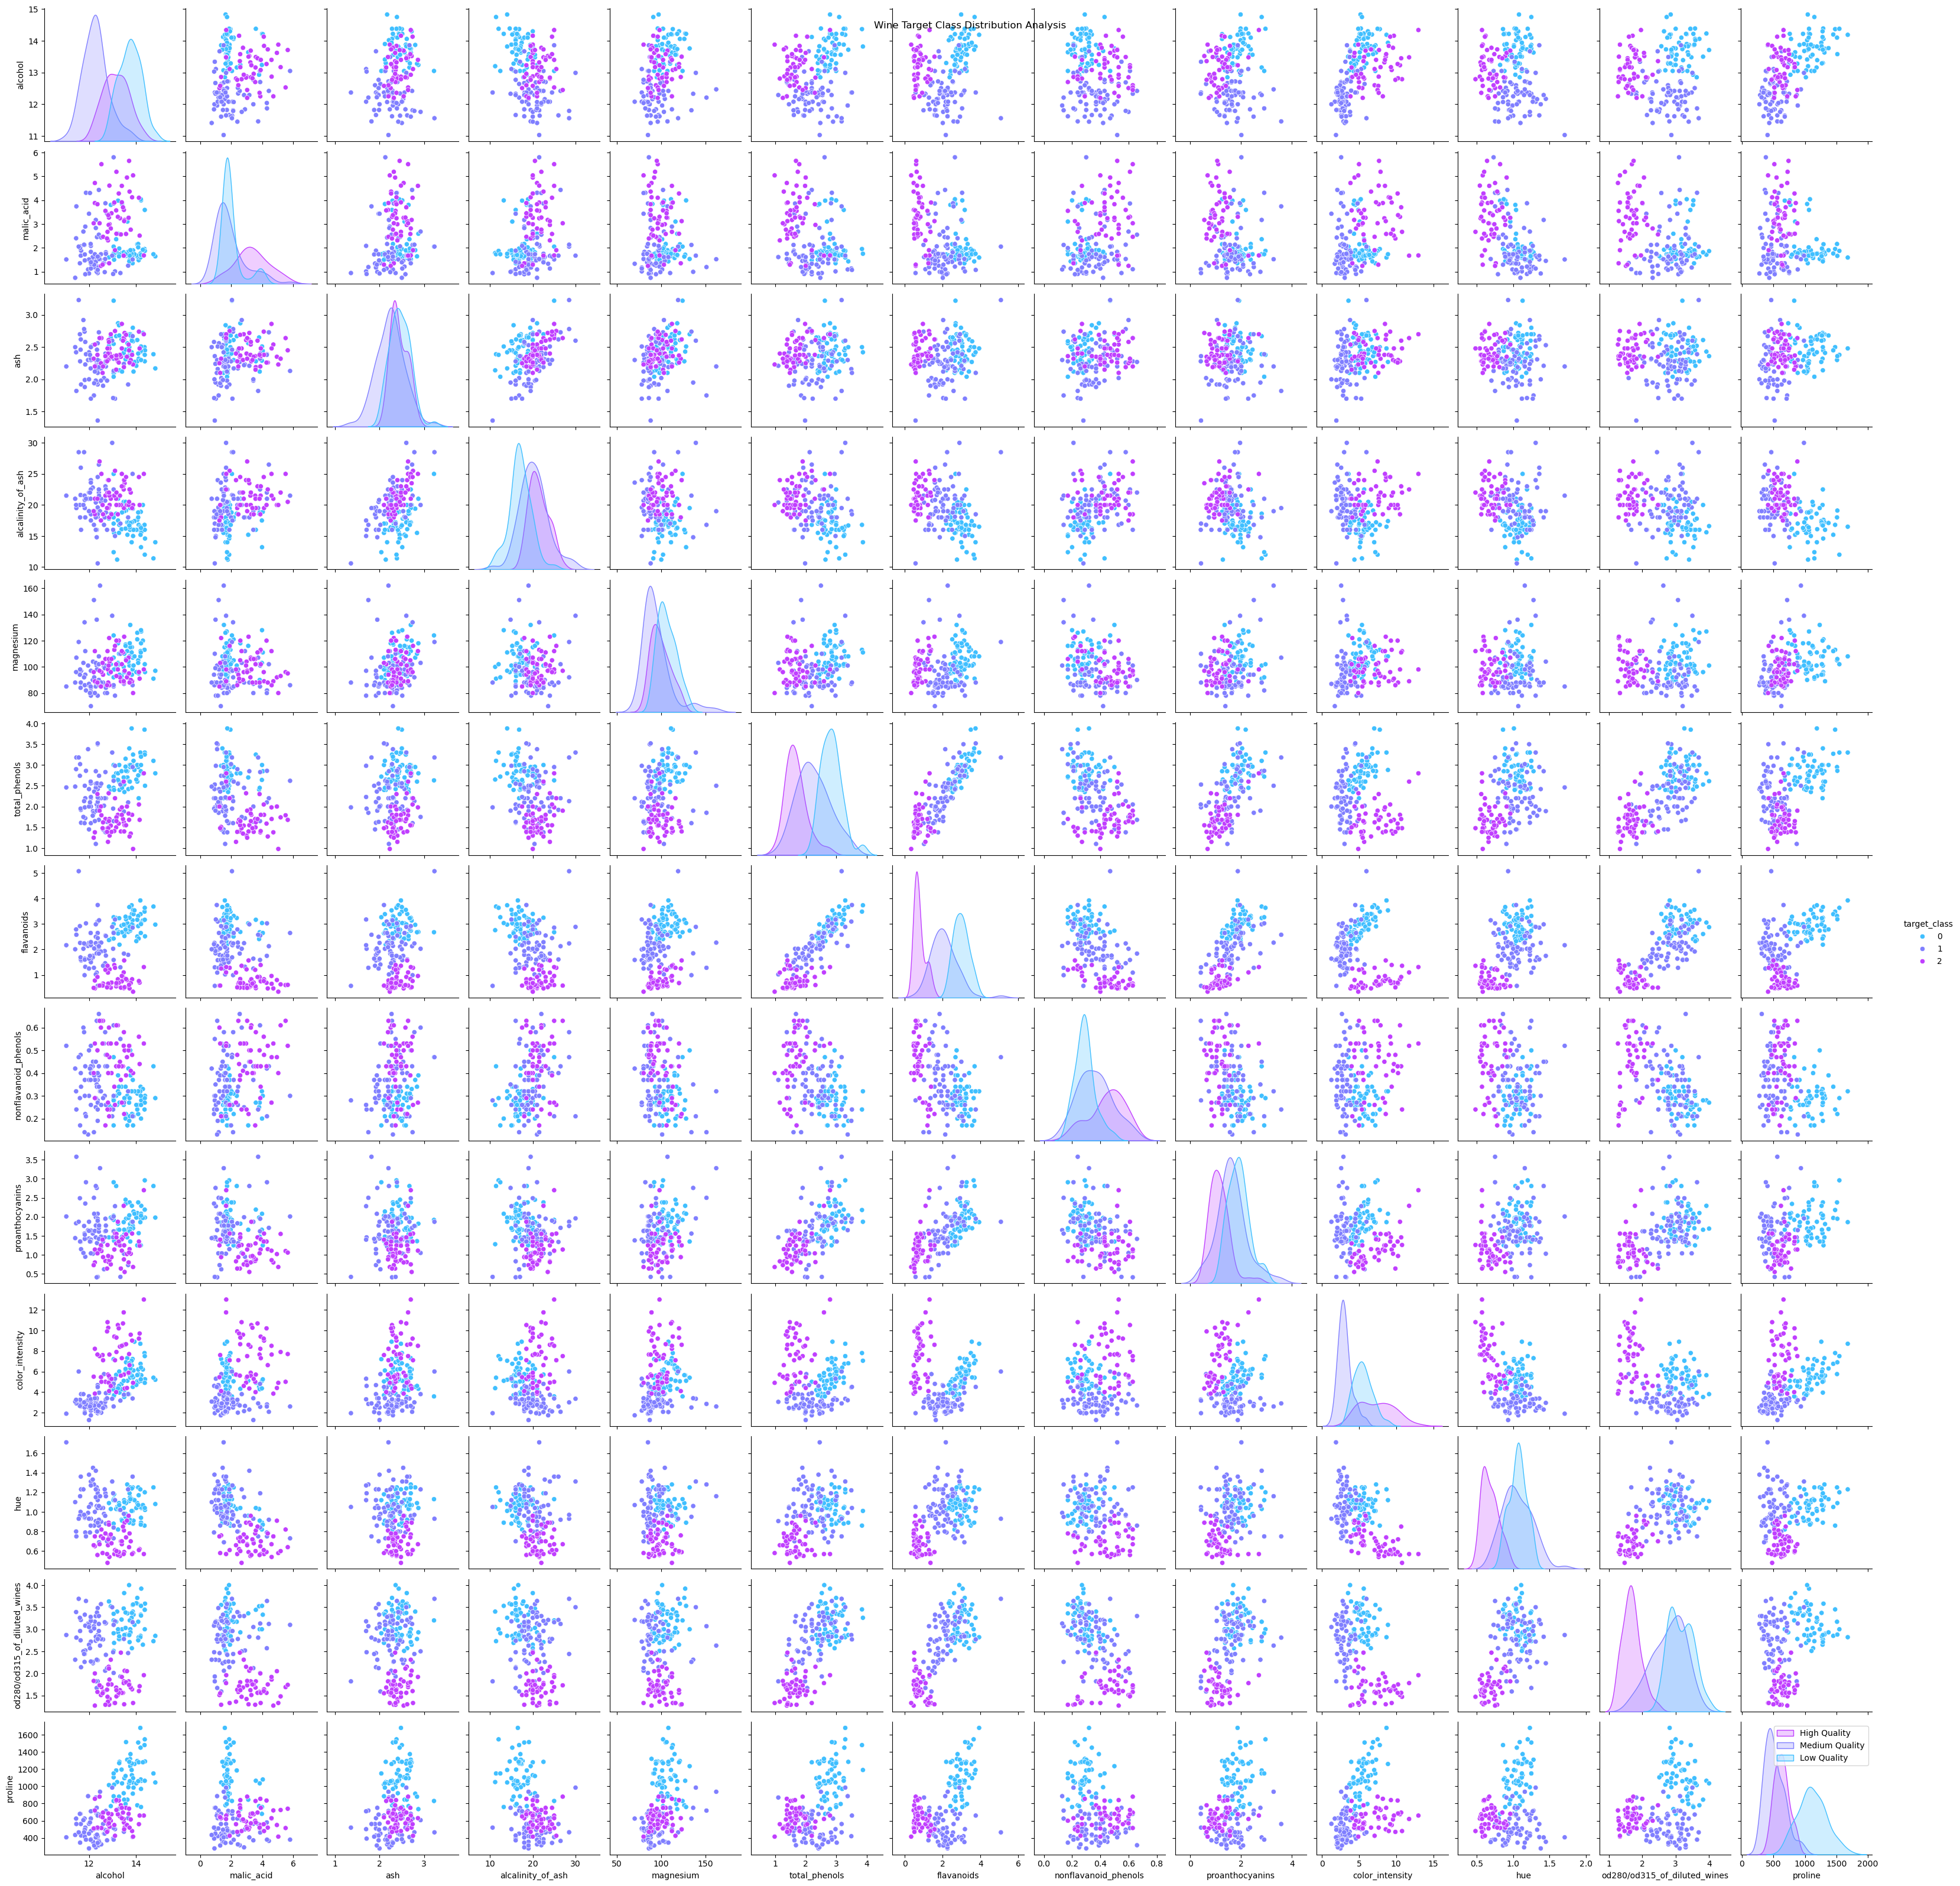

In [128]:
sns.pairplot(data=df, hue=df.columns[-1], palette=sns.color_palette('cool', 3))
plt.legend(classes[::-1])
plt.suptitle('Wine Target Class Distribution Analysis')
plt.show()

# Train test split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state=42)

In [130]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


# Model Building

In [131]:
model = RandomForestClassifier(n_estimators=20)  # DT = 100

In [132]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [133]:
y_pred = model.predict(X_test)

In [134]:
compare_df = pd.DataFrame({"Actual Y":y_test,"predicted Y" : y_pred})
compare_df.sample()

Actual Y  predicted Y
24         0            0

# Confusion matrix

In [135]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

In [136]:
score = round(model.score(X_test,y_test)*100,2)
score

100.0

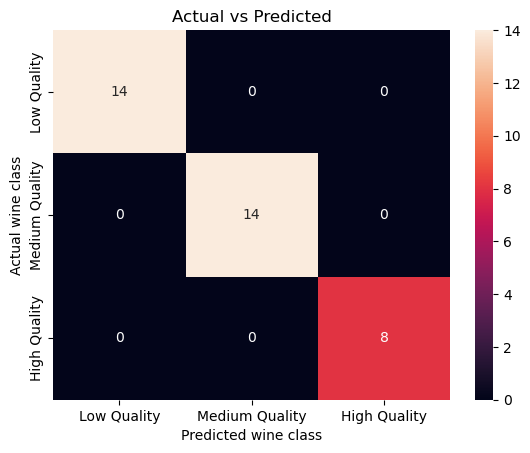

In [137]:
sns.heatmap(cm,annot =True)
plt.title("Actual vs Predicted")
plt.xlabel("Predicted wine class")
plt.ylabel("Actual wine class")
plt.xticks(np.arange(3)+0.5,classes)
plt.yticks(np.arange(3)+0.5,classes)
plt.show()

In [138]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# Wine Target Prediction

In [139]:
classes = ['Low Quality', 'Medium Quality', 'High Quality']

sample_data = pd.DataFrame(X_scaled).sample()  
ans = model.predict(sample_data)[0]
print(f"\nPredicted Wine Target Type ({ans}) as : {classes[ans]}") 


Predicted Wine Target Type (2) as : High Quality


# Model save

In [140]:
import pickle

In [141]:
with open("wine_quality_predict_brain.pkl","wb") as f:
  pickle.dump(model,f)
print('Done')

Done


In [142]:
with open("wine_features_scaler.pkl","wb") as f:
  pickle.dump(scaler,f)
print('Done')

Done


In [143]:
# Designed By : ALTAF HUSAIN DATA ANALYST